In [138]:
import pandas as pd
import numpy as np

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# ***BorderBrews: beer recommendation model***

# Data-preprocessing

In [139]:
# import datasets to dataframe
user_reviews = pd.read_csv('BA_Dataframe.csv')[['beer/name','beer/beerId','review/profileName','review/overall','review/appearance','review/aroma','review/palate','review/taste','review/text']]
user_reviews.head()

,beer/name,beer/beerId,review/profileName,review/overall,review/appearance,review/aroma,review/palate,review/taste,review/text
0,beer/name': 'Sausa Weizen','beer/beerId': '47986','review/profileName': 'stcules','review/overall': '1.5','review/appearance': '2.5','review/aroma': '2','review/palate': '1.5','review/taste': '1.5','review/text': 'A lot of foam. But a lot.\tIn...
1,beer/name': 'Red Moon','beer/beerId': '48213','review/profileName': 'stcules','review/overall': '3','review/appearance': '3','review/aroma': '2.5','review/palate': '3','review/taste': '3',"'review/text': 'Dark red color, light beige f..."
2,beer/name': 'Black Horse Black Beer','beer/beerId': '48215','review/profileName': 'stcules','review/overall': '3','review/appearance': '3','review/aroma': '2.5','review/palate': '3','review/taste': '3','review/text': 'Almost totally black. Beige f...
3,beer/name': 'Sausa Pils','beer/beerId': '47969','review/profileName': 'stcules','review/overall': '3','review/appearance': '3.5','review/aroma': '3','review/palate': '2.5','review/taste': '3',"'review/text': 'Golden yellow color. White, c..."
4,beer/name': 'Cauldron DIPA','beer/beerId': '64883','review/profileName': 'johnmichaelsen','review/overall': '4','review/appearance': '4','review/aroma': '4.5','review/palate': '4','review/taste': '4.5',"'review/text': ""According to the website, the..."


In [140]:
# rename columns
user_reviews = user_reviews.rename(columns={'beer/name': 'beer_name', \
                                    'beer/beerId': 'beer_id',\
                                    'review/profileName':'user_name',\
                                    'review/overall':'user_overall_rating',\
                                    'review/appearance':'user_appearance_rating',\
                                    'review/aroma':'user_aroma_rating',\
                                    'review/palate':'user_palate_rating',\
                                    'review/taste':'user_taste_rating',\
                                    'review/text':'user_review'})
#user_reviews.head()

In [141]:
# clean values in dataframe
user_reviews = user_reviews.astype(str)
user_reviews['beer_name'] = user_reviews['beer_name'].str.split("': '").str[1].str.rstrip("'")
user_reviews['beer_id'] = user_reviews['beer_id'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_name'] = user_reviews['user_name'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_appearance_rating'] = user_reviews['user_appearance_rating'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_aroma_rating'] = user_reviews['user_aroma_rating'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_palate_rating'] = user_reviews['user_palate_rating'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_taste_rating'] = user_reviews['user_taste_rating'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_overall_rating'] = user_reviews['user_overall_rating'].str.split("': '").str[1].str.rstrip("'")
user_reviews['user_review'] = user_reviews['user_review'].str.split("': '").str[1].str.rstrip("'")
#user_reviews.head()

In [142]:
user_reviews = user_reviews.dropna()
user_reviews['beer_id'] = user_reviews['beer_id'].astype(int)
user_reviews['user_appearance_rating'] = user_reviews['user_appearance_rating'].astype(np.float16)
user_reviews['user_aroma_rating'] = user_reviews['user_aroma_rating'].astype(np.float16) 
user_reviews['user_palate_rating'] = user_reviews['user_palate_rating'].astype(np.float16)
user_reviews['user_taste_rating'] = user_reviews['user_taste_rating'].astype(np.float16)
user_reviews['user_overall_rating'] = user_reviews['user_overall_rating'].astype(np.float16) 

beer_types_count = user_reviews['beer_name'].value_counts() 
print("Number of beers: ", len(beer_types_count))
user_reviews

Number of beers:  42525


,beer_name,beer_id,user_name,user_overall_rating,user_appearance_rating,user_aroma_rating,user_palate_rating,user_taste_rating,user_review
0,Sausa Weizen,47986,stcules,1.5,2.5,2.0,1.5,1.5,A lot of foam. But a lot.\tIn the smell some b...
1,Red Moon,48213,stcules,3.0,3.0,2.5,3.0,3.0,"Dark red color, light beige foam, average.\tIn..."
2,Black Horse Black Beer,48215,stcules,3.0,3.0,2.5,3.0,3.0,"Almost totally black. Beige foam, quite compac..."
3,Sausa Pils,47969,stcules,3.0,3.5,3.0,2.5,3.0,"Golden yellow color. White, compact foam, quit..."
6,Caldera Ginger Beer,52159,Reidrover,3.5,3.5,3.5,4.0,4.0,"22 oz bottle from ""Lifesource"" Salem. $3.95 Ni..."
...,...,...,...,...,...,...,...,...,...
1586586,Big Thumper Ale,34215,tgbljb,3.5,3.5,3.5,3.5,3.5,Enjoyed direct from the tank at the breweery.\...
1586587,Big Thumper Ale,34215,cbl2,3.5,3.5,3.5,3.5,3.5,12/9/2006\t$5.00\t1 liter\t5.80%\tNo best by d...
1586590,Bear Mountain Ale,62147,Buddha22,2.0,3.0,2.5,2.0,2.5,A: A good golden color with nice head retentio...
1586593,Bear Mountain Ale,62147,claspada,1.0,3.0,2.0,2.0,1.0,Pours a golden honey colored ale with amber hi...


In [143]:
# drop beers that has less than 10 reviews
beer_types_count = user_reviews['beer_name'].value_counts()
beer_types_to_drop = beer_types_count[beer_types_count < 10].index
user_reviews_dropped = user_reviews[~user_reviews['beer_name'].isin(beer_types_to_drop)]
beer_types_count_after_drop = user_reviews_dropped['beer_name'].value_counts()
print("Number of beers with more than or equal to 10 reviews: ", len(beer_types_count_after_drop))

# keep only 10 reviews for each beer 
user_reviews_filtered = user_reviews_dropped.groupby('beer_name').head(10).reset_index(drop=True)
user_reviews_filtered

Number of beers with more than or equal to 10 reviews:  8653


,beer_name,beer_id,user_name,user_overall_rating,user_appearance_rating,user_aroma_rating,user_palate_rating,user_taste_rating,user_review
0,Rauch √úr Bock,58046,UCLABrewN84,4.5,3.0,4.5,4.0,4.5,Pours a murky light brown with a 1 inch fizzy ...
1,Rauch √úr Bock,58046,zaphodchak,4.0,4.0,4.0,3.0,4.0,Faint sudsy head with some with some dissipati...
2,Rauch √úr Bock,58046,Tilley4,4.0,4.0,4.5,3.5,4.0,A new arrival to the West TN area... \t\tPours...
3,Rauch √úr Bock,58046,bashiba,4.5,4.0,5.0,4.0,4.0,Poured a slightly cloudy deep amber/red color ...
4,Rauch √úr Bock,58046,Klym,4.5,3.5,4.5,4.0,4.5,Big thanks to N2168 for knocking this off my w...
...,...,...,...,...,...,...,...,...,...
86525,Little Thumper Ale,33647,Gmann,4.0,3.0,3.5,3.5,4.0,Pours a clear straw color with a small wispy w...
86526,Little Thumper Ale,33647,sleazo,5.0,4.0,3.5,4.0,4.5,A_Slightly hazy. The liquid itself is straw ye...
86527,Little Thumper Ale,33647,RblWthACoz,4.0,4.0,4.0,4.0,4.5,Pours a straw yellow. Smells like dried straw ...
86528,Little Thumper Ale,33647,tgbljb,4.5,4.0,4.0,4.0,4.5,Served directly from the tank at the brewery.\...


In [144]:
# For tfidf
# Need a dataframe with beer name and user text reviews
# Replace NaN with an empty string
user_reviews_filtered['user_review'] = user_reviews_filtered['user_review'].fillna('')

# Group the reviews by beer name and concatenate the text reviews within each group
combined_reviews = user_reviews_filtered.groupby(['beer_name'])['user_review'].apply(lambda x: ' '.join(x)).reset_index()

# location dataset

In [145]:
# read the location dataset file
location_dataset = pd.read_csv('combined_location.csv')

# rename columns
location_dataset = location_dataset.rename(columns={'Beer ID': 'beer_id', \
                                    'Beer Name': 'beer_name',\
                                    'Brewery ID':'brewery_id',\
                                    'Brewery Name':'brewery_name',\
                                    'State':'state',\
                                    'Country':'country'})

location_dataset['beer_name'] = location_dataset['beer_name'].str.split('\n').str[0]

# remove duplicates
location_dataset = location_dataset.drop_duplicates(['beer_name'])
location_dataset= location_dataset.drop_duplicates(['beer_id'])

lookup_dict = location_dataset.set_index('beer_name').to_dict(orient='index')

In [147]:
location_dataset

,beer_id,beer_name,brewery_id,brewery_name,state,country
0,351746,The Optimist,617781,Fort George Brewery + Public House,Oregon,United States
1,802233,Fresh IPA,617781,Fort George Brewery + Public House,Oregon,United States
2,779935,Overdub IPA,617781,Fort George Brewery + Public House,Oregon,United States
3,100955,Magnanimous IPA,617781,Fort George Brewery + Public House,Oregon,United States
4,604816,Big Guns,617781,Fort George Brewery + Public House,Oregon,United States
...,...,...,...,...,...,...
47104,736136,Pineapple Pale Ale,499232,Upslope Brewing Company - Lee Hill,Colorado,United States
47105,806302,South African Pale Ale,499232,Upslope Brewing Company - Lee Hill,Colorado,United States
47106,478198,Mary Jane Ale,499232,Upslope Brewing Company - Lee Hill,Colorado,United States
47108,312723,Rye Fish At All?,507497,Boathouse Brewpub & Restaurant,Minnesota,United States


In [154]:
# Set with only beers with location
user_reviews = user_reviews[user_reviews['beer_name'].isin(location_dataset['beer_name'])]
user_reviews_filtered = user_reviews_filtered[user_reviews_filtered['beer_name'].isin(location_dataset['beer_name'])]
combined_reviews = combined_reviews[combined_reviews['beer_name'].isin(location_dataset['beer_name'])]
#combined_reviews = combined_reviews.reset_index()

# number of unique locations
#print("number of unique countries:", location_dataset.drop_duplicates('country').count())
#print("number of unique locations:", location_dataset[['state','country']].drop_duplicates().count())
#print("Number of unique beers: ", combined_reviews.count())
#print('Number of users: ', user_reviews_filtered['user_name'].drop_duplicates().count())


---

# Collaborative filtering SVD 

We can use a latent factors approach by using a Truncated SVD. The default SVD module does not allow for a truncated SVD. The reason, why a truncated SVD is needed is because a standard SVD would require too much memory and processing power. Given that we have a matrix of about 9K x 10K, it would not be feasible.

In [133]:
# create pivot table and make it sparse (impute NANs with 0s)
ratings = ['user_overall_rating', 'user_appearance_rating', 'user_aroma_rating', 'user_palate_rating', 'user_taste_rating']
T_list = []

for r in ratings: 
    user_reviews_pivot = user_reviews.pivot_table(index='user_name', columns='beer_name', values=r).fillna(0)
    T_list.append(user_reviews_pivot.values.T)

Using explained variance to determine the number of components for this Truncated SVD

(5, 0.17361324)
(10, 0.20554496)
(20, 0.2577565)
(50, 0.3693055)
(100, 0.5022454)
(200, 0.66884553)
(300, 0.7698089)
(400, 0.83421075)
(500, 0.8767858)


Text(0.5, 0, 'Number of Components')

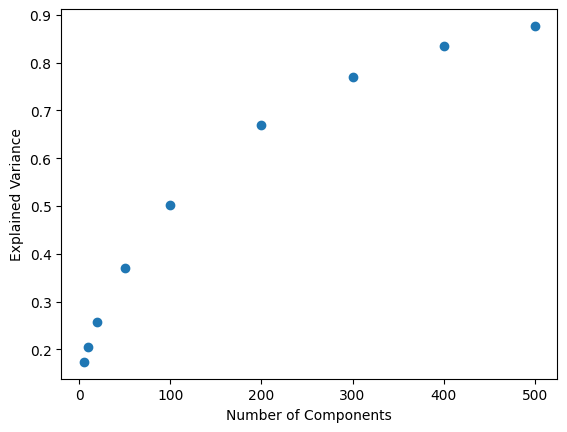

In [60]:
def exp_var(list_n_components):
    '''
    input: list of integers
    output: list of tuples showing n_components and it's explained variance ratio
    '''
    
    out = []
    for num in list_n_components:
        SVD = TruncatedSVD(n_components=num,random_state=num)
        SVD.fit_transform(T_list[0])
        evar = np.sum(SVD.explained_variance_ratio_)
        t = (num,evar)
        out.append(t)
    
    return out

n_comp = [5,10,20,50,100,200,300,400,500]
explained_variance = exp_var(n_comp)

[print(i) for i in explained_variance]

x,y = zip(*explained_variance)
plt.scatter(x, y)
plt.ylabel("Explained Variance")
plt.xlabel("Number of Components")

Based on the above information, I decided to use 200 components for this truncated svd. 

In [61]:
def trunc_SVD(T, n=200):
    SVD200 = TruncatedSVD(n_components=n,random_state=n)
    matrix200 = SVD200.fit_transform(T)
    
    # correlation/similarity matrix
    corr200 = np.corrcoef(matrix200)
    
    # name of all beers
    beer_rec_names200 = user_reviews_pivot.columns

    # list of all beer names
    beer_rec_list200 = list(beer_rec_names200)
    
    return corr200, beer_rec_list200

In [62]:
def get_svd_rec(string, corr200, beer_rec_list200):
    """
    function returns top n recommendations base on input of beer name and n.
    
    inputs: 
    string (name of beer) -> string
    n (n recommendations) ->  int
    """
    # get index of beer name from list of all beers in the training data
    get_index = beer_rec_list200.index(string)
    
    # similarity coeff of all other beers w respect to the input beer
    similarities = corr200[get_index]

    
    # create  & popluate list to hold tuples of beer names and their 
    # respective correlation coeff, sorted in reverse
    closest = []    
    for idx, coeff in enumerate(similarities):
        closest.append([beer_rec_list200[idx],coeff])
    
    closest.sort(key=lambda x: x[1], reverse=True)
    
    return closest

In [63]:
def SVD(string, feature = 'overall'):
    
    feature_list = ['overall', 'appearance', 'aroma', 'palate', 'taste']
    key = feature_list.index(feature)
    T = T_list[key]
    corr200, beer_rec_list200 = trunc_SVD(T)

    # results list of ('beer_name',"similarity score")
    result = get_svd_rec(string, corr200, beer_rec_list200)[1:]
    
    return result

Lets get the top 20 recommendations for the same beers we looked at earlier

In [64]:
SVD('Caldera IPA', 'aroma')

[['Ashland Amber', 0.5776605853984337],
 ['Islander IPA', 0.5227474485394927],
 ['Total Domination IPA', 0.4976396955225973],
 ['Workhorse IPA', 0.4950155660914774],
 ['Pecan Harvest Ale', 0.48018958958769875],
 ['Full Nelson Virginia Pale Ale', 0.4783278520114634],
 ['Alpha Dog Imperial IPA', 0.47716815358275283],
 ['Hoppyum IPA', 0.4676094426603438],
 ['Hopworks IPA', 0.46464623783008074],
 ['Sue', 0.46419642049497073],
 ['India Pelican Ale', 0.46088037911580765],
 ['Apex', 0.45679822818584154],
 ['Mission IPA', 0.4505177386815767],
 ['Tricerahops Double IPA', 0.4428245206708846],
 ['Northern Lights IPA', 0.4380511400836943],
 ['Jamaica Sunset India Pale Ale', 0.4349313125275653],
 ['Mach 10', 0.43016150089488014],
 ['Hopportunity Knocks', 0.43003882002441685],
 ['Meltdown Double IPA', 0.41916499244843114],
 ['The Dogfather', 0.41629395005355013],
 ['Leafer Madness', 0.41536237636804685],
 ['Watershed IPA', 0.41512718389547804],
 ['Baltic Porter', 0.4145680328300794],
 ['The Big DIPA

---
# Content-based method TF-IDF

In [155]:
indices = pd.Series(combined_reviews.index, index=combined_reviews['beer_name'])

In [123]:
def TFIDF(name):
    # Create a TfidfVectorizer and Remove stopwords
    tfidf = TfidfVectorizer(stop_words='english')
    
    # Fit and transform the data to a tfidf matrix
    tfidf_matrix = tfidf.fit_transform(combined_reviews['user_review']).astype(np.float16)
    
    # Compute the cosine similarity between each beer description
    cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    result = get_cb_rec(name, cosine_sim=cos_sim)
    
    return result

def get_cb_rec(name, cosine_sim):
    idx = indices[name]
    
    # Get the similarity scores for the specified beer
    similarity_scores = cosine_sim[idx]
    sorted_similarity_scores = sorted(similarity_scores,reverse=True)
    sorted_similarity_scores = sorted_similarity_scores[1:]

    # Sort the similarity scores in descending order
    top_similar_indices = np.argsort(similarity_scores)[::-1]

    # Exclude the beer itself (first index)
    top_similar_indices = top_similar_indices[1:]
    
    # Ensure top_similar_indices is converted to a 1-dimensional array
    top_similar_indices = np.ravel(top_similar_indices)
    # Retrieve the beer names using the top similar indices
    top_similar_beers = combined_reviews.loc[top_similar_indices, 'beer_name']

    out = []
    for i in range(top_similar_beers.size):
        out.append([combined_reviews.loc[top_similar_indices[i], 'beer_name'], sorted_similarity_scores[i]*2-1])

    return out

In [124]:
TFIDF('Caldera IPA')

[['Howl', -0.21396486239973456],
 ['Mönchshof Schwarzbier', -0.2468778241891414],
 ['Black Bavarian', -0.2908324407180771],
 ['Yebisu Black Beer', -0.29358764039352536],
 ['Zeitgeist', -0.31592089869081974],
 ['Red Fox', -0.3196647772565484],
 ['Cherny Bock', -0.3204223217908293],
 ['Porter', -0.3308062484720722],
 ['Anchor Porter', -0.3342746433336288],
 ['Das Schwarze', -0.34645136643666774],
 ['Guinness Black Lager', -0.3501852503977716],
 ['Black Top', -0.3570398008450866],
 ['Schwarzbier', -0.35743113444186747],
 ['Klosterbräu Schwärzla', -0.35747324291151017],
 ['Lev Black Lion', -0.3671830864623189],
 ['Magnus', -0.36961327760946006],
 ['Stout', -0.3747402635635808],
 ['Black Radish Dark Lager', -0.37506700051017106],
 ['Sinebrychoff Porter', -0.3761653946712613],
 ['Black', -0.3797720179427415],
 ['Schwarz', -0.3811458559939638],
 ['Barbarossa Double Dark Lager', -0.38122236204799265],
 ['Trout Hop Black IPA', -0.38217373157385737],
 ['Black Albert', -0.38237664476037025],
 ['I


## Combine the SVD and TFIDF models 

In [69]:
def hybrid_recommendations(beer_name, feature='overall', n_recommendations=875):
    # Collaborative filtering using SVD
    svd_rec = SVD(beer_name,feature)
    
    # Content-based filtering
    cb_rec = TFIDF(beer_name)

    # sum up the similarity from both list
    # Create a dictionary to store beer names and their total similar values
    beer_totals = {}

    # Update beer totals from list1
    for beer, value in svd_rec:
        if beer in beer_totals:
            beer_totals[beer] += value
        else:
            beer_totals[beer] = value

    # Update beer totals from list2
    for beer, value in cb_rec:
        if beer in beer_totals:
            beer_totals[beer] += value
        else:
            beer_totals[beer] = value

   # Find common beer names
    common_beer_names = set(beer_totals.keys()).intersection({beer[0] for beer in svd_rec}, {beer[0] for beer in cb_rec})

    # Sort common beer names by total value
    sorted_common_beer_names = sorted(common_beer_names, key=lambda beer: beer_totals[beer], reverse=True)
    out = sorted_common_beer_names[:n_recommendations]
    value = []
    for beer in out:
        value.append(beer_totals[beer])
    
    return out,value

## Test the hybrid model

In [70]:
# Test the recommendation system
beer_name = 'Leafer Madness'
recommendations, val = hybrid_recommendations(beer_name)
print("Recommendations for", beer_name, ":")
print(recommendations)

Recommendations for Leafer Madness :
['Tricerahops Double IPA', 'Total Domination IPA', 'Lost Continent Double IPA', 'Caldera IPA', 'Hop Diggidy IPA', 'Hopportunity Knocks', 'Hopworks IPA', 'Islander IPA', 'Meltdown Double IPA', 'Alpha Dog Imperial IPA', 'Big Swell IPA', 'Hop 15', 'Watershed IPA', 'Terminal Gravity IPA', 'Ace Of Spades', 'Hop Bomb', 'Devil Dog', 'Industrial IPA', 'Pigskin Pale Ale', 'Indica India Pale Ale', 'Workhorse IPA', 'India Pelican Ale', 'Mission IPA', 'High Tide Fresh Hop IPA', 'Imperial IPA', 'Abominable Winter Ale', 'Fresh Hop Pale Ale', 'Ashland Amber', 'Vortex IPA', 'The Oracle', 'Pure Hoppiness', 'Detour Double India Pale Ale', 'Warrior IPA', 'Cohoho Imperial IPA', 'Apex', 'Maiden The Shade', 'Pursuit Of Hoppiness', 'Cold Hop British-Style Ale', 'HopArt IPA', 'Marble IPA', 'The Big DIPA', 'Mojo IPA', 'XP Pale Ale', 'Gluttony', 'Hop Dam Triple IPA', 'Estate Homegrown Wet Hop Ale', 'Chesapeake Pale Ale', 'XS Imperial India Pale Ale', 'Doggie Claws', 'Blackhe

## Additional location filter

location filter dataset:
1. 'beer/name': 'Sausa Weizen'
2. 'beer/beerId': '47986'
3. 'beer/brewerId': '10325'
4. 'beer/breweryName':
5. 'beer/state'
6. 'beer/country'

Dataframe name: lookup_df
1. beer_name
2. beer_id
3. brewery_name
4. brewery_id
5. state
6. country

In [71]:
def location_filter(ranked_beers, lookup_dict, state='', country='', n=875):
    """ 
    This takes a list of tuples where the 1st element is a beer_id. It searches through the lookup dictionary
    to match breweries based upon their location. And returns n number of recommendations

    It returns the beer_id as key, and brewery_name, beer id, and beer name as values
    """
    located_brewery = {}
    # state = 'CA'
    # city = 'Los Angeles'
    counter = 0

    for beer in ranked_beers:
        if counter < n:
            dict_state = lookup_dict[beer]['state']
            dict_country = lookup_dict[beer]['country']
            brewery_id = lookup_dict[beer]['brewery_id']
            brewery_name = lookup_dict[beer]['brewery_name']
            #beer_name = lookup_dict[beer[0]]['beer_name']
            if (len(state) > 0) and (len(country)>0):
                if (dict_state == state) and (dict_country == country):
            #             print(beer_breweries_lookup[beer[0]])
                    if brewery_id in located_brewery:
                        continue
                    else:  
                        located_brewery[brewery_id] = [brewery_name, beer]
                
                    counter += 1
                    
            # ignores state field
            elif len(state) == 0:
                if (dict_country == country):        
                    if brewery_id in located_brewery:
                        continue
                    else:  
                        located_brewery[brewery_id] = [brewery_name, beer]
                
                    counter += 1
                    
            # ignores country field
            elif len(country) == 0:        
                if (dict_state == state):
                    if brewery_id in located_brewery:
                        continue
                    else:  
                        located_brewery[brewery_id] = [brewery_name, beer]
                
                    counter += 1
    if len(located_brewery) > 0:
        return located_brewery
    else:
        return 

In [72]:
# test location filter
"""
Input: 
1. results from recomendation system - list of tuples [(beer_id, beer_name)]
2. global dict of brewery name, beer name, brewery id, state, country
3. search state
4. search country
5. number of recommendations
"""
results = location_filter(recommendations, lookup_dict, 'Oregon', 'United States')
print(results.values())
print(len(results))

dict_values([['Ninkasi Brewing Company', 'Tricerahops Double IPA'], ['Caldera Brewing Company', 'Caldera IPA'], ['Hopworks Urban Brewery', 'Hopworks IPA'], ['Oakshire Brewing', 'Watershed IPA'], ['Terminal Gravity Brewing Company', 'Terminal Gravity IPA'], ['Beer Valley Brewing Co.', 'Pigskin Pale Ale'], ['Laurelwood Public House & Brewery', 'Workhorse IPA'], ['Pelican Pub & Brewery', 'India Pelican Ale'], ['Fort George Brewery + Public House', 'Vortex IPA'], ['Rogue Ales', 'XS Imperial India Pale Ale'], ['Hair Of The Dog Brewing Company / Brewery And Tasting Room', 'Doggie Claws'], ['Deschutes Brewery', 'Mirror Pond Pale Ale'], ['Pyramid Breweries, Inc.', 'Thunderhead IPA'], ['Golden Valley Brewery and Pub', 'Tannen Bomb'], ['Thunder Island Brewing', 'Dark Force'], ['Cascade Brewing / Raccoon Lodge & Brewpub', 'Apricot Ale']])
16


## Testing functions 
RMSE and MAE

In [73]:
# Recommendation: [A, B, C]

import math

def accuracy_test(beer_name, recommendations):

    ratings = ['user_appearance_rating', 'user_aroma_rating', 'user_palate_rating', 'user_taste_rating', 'user_overall_rating']

    # Compute y_actual
    y_actual_list = []
    beer_data_actual = user_reviews[user_reviews['beer_name'] == beer_name]
    for i in ratings:
        y_actual_list.append(beer_data_actual[i].mean())
    y_actual = np.array(y_actual_list, dtype=np.float16)

    # Compute y_pred
    y_pred_list = []
    for beer_name in recommendations:
        beer_data = user_reviews[user_reviews['beer_name'] == beer_name]
        attribute = []
        for feature in ratings:
            attribute.append(beer_data[feature].mean())
        y_pred_list.append(attribute)
    y_pred = np.array(y_pred_list, dtype=np.float16)

    # Compute RMSE
    MSE = np.square(np.subtract(y_actual, y_pred)).mean()
    RMSE = math.sqrt(MSE)
    #print("Root Mean Square Error:", RMSE)

    # Compute MAE
    abs_errors = np.abs(y_actual - y_pred)
    MAE = np.mean(abs_errors)
    #print("Mean Absolute Error:", MAE)
    return RMSE, MAE

In [74]:
print(recommendations)

['Tricerahops Double IPA', 'Total Domination IPA', 'Lost Continent Double IPA', 'Caldera IPA', 'Hop Diggidy IPA', 'Hopportunity Knocks', 'Hopworks IPA', 'Islander IPA', 'Meltdown Double IPA', 'Alpha Dog Imperial IPA', 'Big Swell IPA', 'Hop 15', 'Watershed IPA', 'Terminal Gravity IPA', 'Ace Of Spades', 'Hop Bomb', 'Devil Dog', 'Industrial IPA', 'Pigskin Pale Ale', 'Indica India Pale Ale', 'Workhorse IPA', 'India Pelican Ale', 'Mission IPA', 'High Tide Fresh Hop IPA', 'Imperial IPA', 'Abominable Winter Ale', 'Fresh Hop Pale Ale', 'Ashland Amber', 'Vortex IPA', 'The Oracle', 'Pure Hoppiness', 'Detour Double India Pale Ale', 'Warrior IPA', 'Cohoho Imperial IPA', 'Apex', 'Maiden The Shade', 'Pursuit Of Hoppiness', 'Cold Hop British-Style Ale', 'HopArt IPA', 'Marble IPA', 'The Big DIPA', 'Mojo IPA', 'XP Pale Ale', 'Gluttony', 'Hop Dam Triple IPA', 'Estate Homegrown Wet Hop Ale', 'Chesapeake Pale Ale', 'XS Imperial India Pale Ale', 'Doggie Claws', 'Blackheart', 'Pine Belt Pale Ale', 'Mountain

# Testing and evaluation with RMSE and MAE

In [75]:
# store all RMSE and MAE values using hybrid model
unique_beers = combined_reviews['beer_name'][:100]
RMSE_values = []
MAE_values = []

for beer in unique_beers:
    recommendations, val = hybrid_recommendations(beer)
    RMSE, MAE = accuracy_test(beer, recommendations)
    RMSE_values.append(RMSE)
    MAE_values.append(MAE)


In [120]:
# store all RMSE and MAE values using svd model
svd_RMSE_values = []
svd_MAE_values = []

for beer in unique_beers:
    rec = SVD(beer)
    recommendations = [beer[0] for beer in rec]
    RMSE, MAE = accuracy_test(beer, recommendations)
    svd_RMSE_values.append(RMSE)
    svd_MAE_values.append(MAE)


In [125]:
# store all RMSE and MAE values using TFIDF model
tfidf_RMSE_values = []
tfidf_MAE_values = []

for beer in unique_beers:
    rec = TFIDF(beer)
    recommendations = [beer[0] for beer in rec]
    RMSE, MAE = accuracy_test(beer, recommendations)
    tfidf_RMSE_values.append(RMSE)
    tfidf_MAE_values.append(MAE)


0.45565190020552215
0.6167937317218032
0.549641050192565


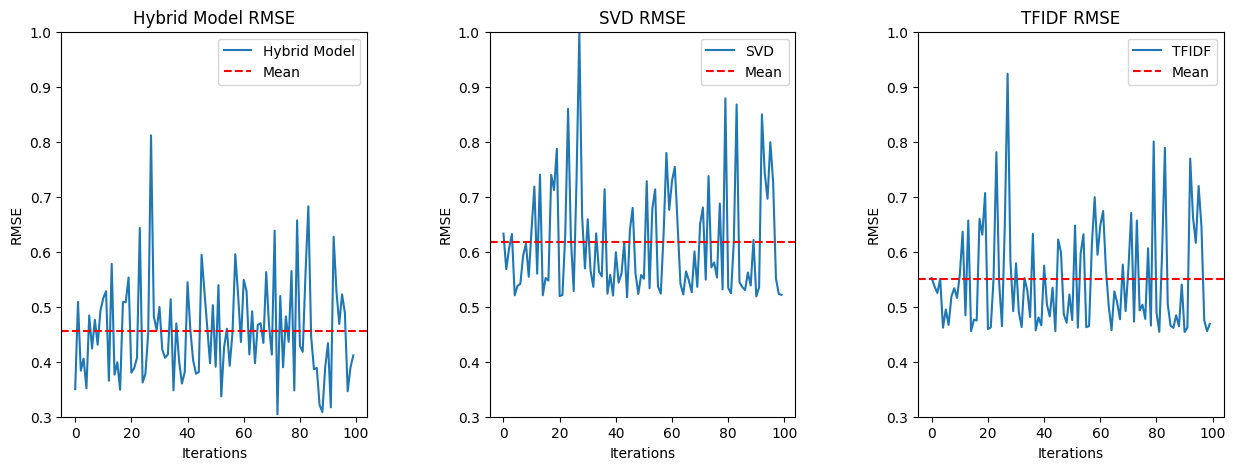

In [126]:
# Plot for RMSE
hybrid_RMSE_mean = np.mean(RMSE_values)
svd_RMSE_mean = np.mean(svd_RMSE_values)
tfidf_RMSE_mean = np.mean(tfidf_RMSE_values)

# Print RMSE mean values
print(hybrid_RMSE_mean)
print(svd_RMSE_mean)
print(tfidf_RMSE_mean)

# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Plot for Hybrid model
axs[0].plot(RMSE_values, label='Hybrid Model')
axs[0].axhline(y=hybrid_RMSE_mean, color='r', linestyle='--', label='Mean')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('RMSE')
axs[0].set_title('Hybrid Model RMSE')
axs[0].legend()
axs[0].set_ylim(0.3, 1)

# Plot for SVD
axs[1].plot(svd_RMSE_values, label='SVD')
axs[1].axhline(y=svd_RMSE_mean, color='r', linestyle='--', label='Mean')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('RMSE')
axs[1].set_title('SVD RMSE')
axs[1].legend()
axs[1].set_ylim(0.3, 1)

# Plot for TFIDF
axs[2].plot(tfidf_RMSE_values, label='TFIDF')
axs[2].axhline(y=tfidf_RMSE_mean, color='r', linestyle='--', label='Mean')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('RMSE')
axs[2].set_title('TFIDF RMSE')
axs[2].legend()
axs[2].set_ylim(0.3, 1)


# Adjust layout
plt.subplots_adjust(wspace=0.4)

# Show plot
plt.show()

0.348
0.4636
0.4048


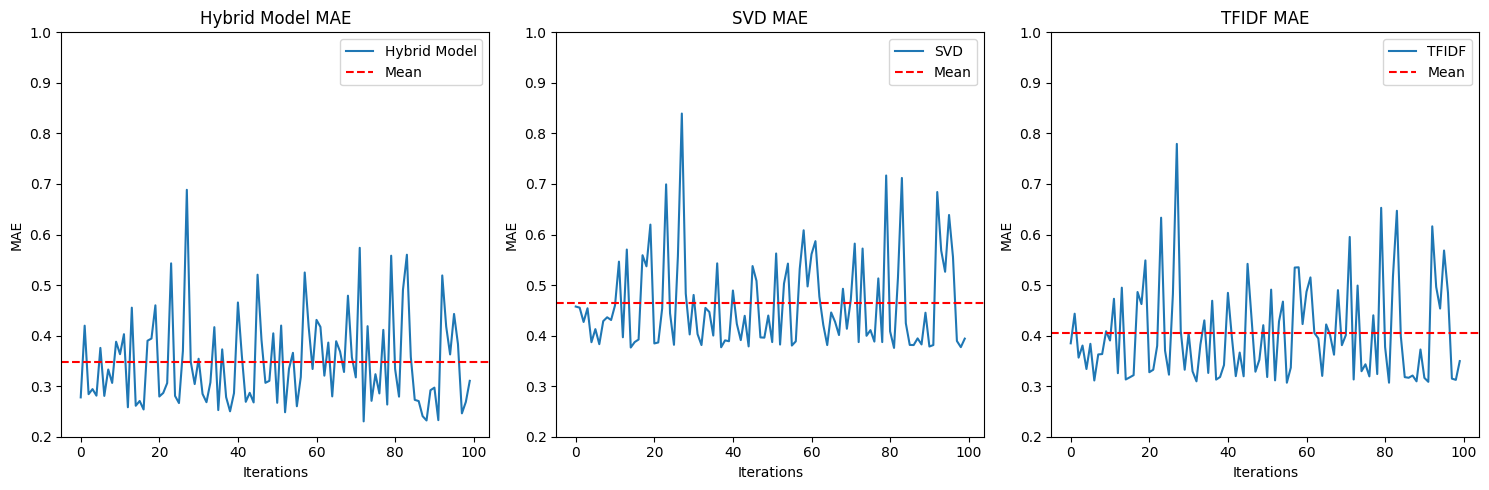

In [127]:
# Plot for MAE
hybrid_MAE_mean = np.mean(MAE_values)
svd_MAE_mean = np.mean(svd_MAE_values)
tfidf_MAE_mean = np.mean(tfidf_MAE_values)

# Print RMSE mean values
print(hybrid_MAE_mean)
print(svd_MAE_mean)
print(tfidf_MAE_mean)

# Create figure and axes for subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Plot for Hybrid model
axs[0].plot(MAE_values, label='Hybrid Model')
axs[0].axhline(y=hybrid_MAE_mean, color='r', linestyle='--', label='Mean')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('MAE')
axs[0].set_title('Hybrid Model MAE')
axs[0].legend()
axs[0].set_ylim(0.2, 1)

# Plot for SVD
axs[1].plot(svd_MAE_values, label='SVD')
axs[1].axhline(y=svd_MAE_mean, color='r', linestyle='--', label='Mean')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('MAE')
axs[1].set_title('SVD MAE')
axs[1].legend()
axs[1].set_ylim(0.2, 1)

# Plot for TFIDF
axs[2].plot(tfidf_MAE_values, label='TFIDF')
axs[2].axhline(y=tfidf_MAE_mean, color='r', linestyle='--', label='Mean')
axs[2].set_xlabel('Iterations')
axs[2].set_ylabel('MAE')
axs[2].set_title('TFIDF MAE')
axs[2].legend()
axs[2].set_ylim(0.2, 1)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()